## Preparação do ambiente

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Deixe o estilo padrão do seaborn
sns.set()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Carregar os dados (`titanic`) e olhar rapidamente

In [2]:
# Carregar
df = sns.load_dataset("titanic")

# Selecionar apenas variáveis categóricas que vamos usar
# (você pode trocar por outras na mesma lógica)
df = df[["sex", "class", "embarked", "survived"]]

# Tirar linhas com NA nas variáveis escolhidas (para facilitar nesta aula)
df = df.dropna(subset=["sex", "class", "embarked", "survived"])

# Conferir 5 primeiras linhas
df.head()

,sex,class,embarked,survived
0,male,Third,S,0
1,female,First,C,1
2,female,Third,S,1
3,female,First,S,1
4,male,Third,S,0


## Pergunta 1: **Classe × Sexo**  

### Como a distribuição de passageiros por **classe** varia entre **sexos**?


### a) Contagens simples (barras com `hue`) — **o mais básico**

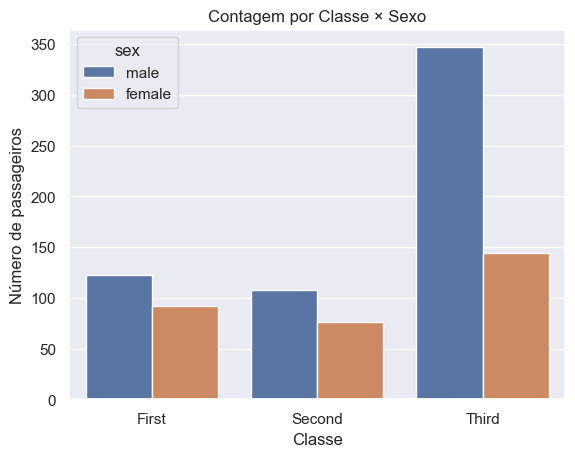

In [3]:
# Barras de contagem com seaborn (duas categóricas): class × sex

ax = sns.countplot(data=df, x="class", hue="sex")
ax.set_title("Contagem por Classe × Sexo")
ax.set_xlabel("Classe")
ax.set_ylabel("Número de passageiros")
plt.show()

### b) Percentuais por **classe** (cada barra soma 100%)



#### Calcular taxa de sobrevivência por classe e sexo

In [4]:
cross_tab = pd.crosstab(df['class'], df['sex'], normalize='index') * 100

cross_tab

sex,female,male
class,,
First,42.990654,57.009346
Second,41.304348,58.695652
Third,29.327902,70.672098


In [5]:
cross_tab = cross_tab.reset_index().melt(id_vars='class', var_name='sex', value_name='percent')

cross_tab.head()

,class,sex,percent
0,First,female,42.990654
1,Second,female,41.304348
2,Third,female,29.327902
3,First,male,57.009346
4,Second,male,58.695652


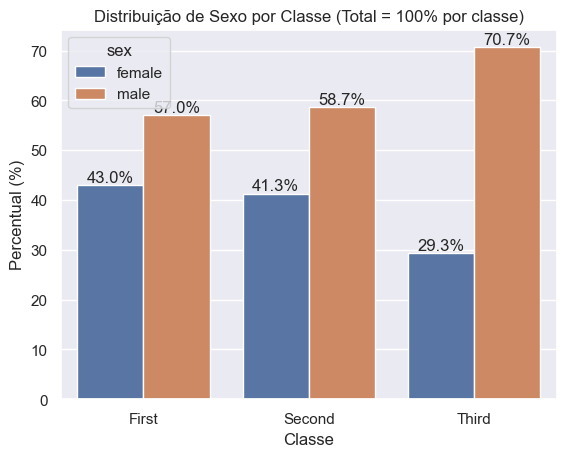

In [6]:
# Fazer o gráfico
ax = sns.barplot(data=cross_tab, x='class', y='percent', hue='sex')
ax.set_title("Distribuição de Sexo por Classe (Total = 100% por classe)")
ax.set_xlabel("Classe")
ax.set_ylabel("Percentual (%)")

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()


Dica: Use contagens quando o tamanho do grupo importa. Use percentuais quando você quer comparar **composição** (proporção de mulheres/homens em cada classe).


## Pergunta 2: **Sobrevivência × Sexo**  

Há diferenças no nos   **sobreviventes/mortos** por **sexo**?


### a) Contagens (básico)

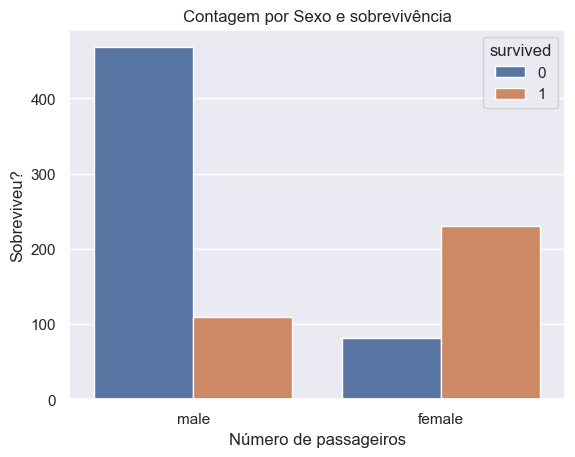

In [7]:
ax = sns.countplot(data=df, x="sex", hue="survived")
ax.set_title("Contagem por Sexo e sobrevivência")
ax.set_xlabel("Número de passageiros")
ax.set_ylabel("Sobreviveu?")
plt.show()


### b) Percentuais por **sobrevivência**  e sexo

In [8]:
cross_tab2 = pd.crosstab(df['survived'], df['sex'], normalize='index') * 100

cross_tab2 = cross_tab2.reset_index().melt(id_vars='survived', var_name='sex', value_name='percentual')

cross_tab2

,survived,sex,percentual
0,0,female,14.754098
1,1,female,67.941176
2,0,male,85.245902
3,1,male,32.058824


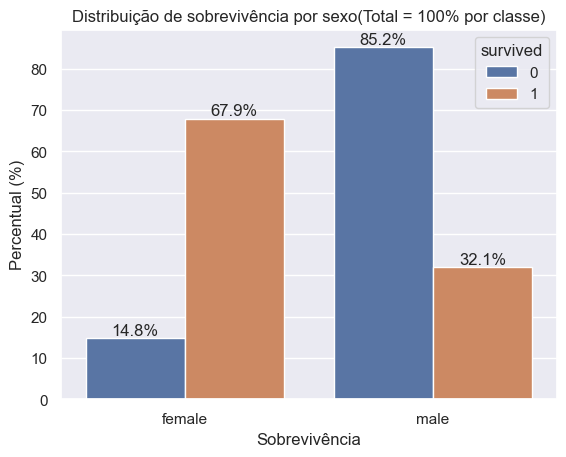

In [9]:
# Fazer o gráfico
ax = sns.barplot(data=cross_tab2, x='sex', y='percentual', hue='survived')
ax.set_title("Distribuição de sobrevivência por sexo(Total = 100% por classe)")
ax.set_xlabel("Sobrevivência")
ax.set_ylabel("Percentual (%)")

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()


## Barras segmentadas (via Pandas)

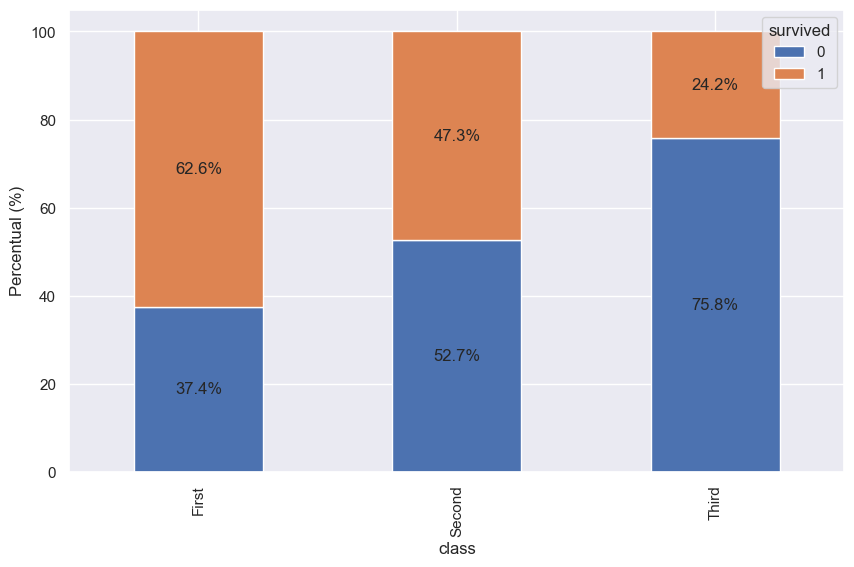

In [10]:
# Calcular percentuais que somam 100%
cross_tab3 = pd.crosstab(df['class'], df['survived'], normalize='index') * 100

# Criar gráfico de barras segmentadas
ax = cross_tab3.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel("Percentual (%)")

# Adicionar valores nos segmentos
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Fundamento: `pandas.melt()` (wide → long)

`melt()` **reorganiza colunas em linhas**. É útil quando seus dados estão em *formato largo* (várias colunas que representam a mesma coisa) e você quer colocá-los em *formato longo* (uma coluna com o nome da variável e outra com o valor), **facilitando gráficos no seaborn**.

- `id_vars=` colunas que **não** devem ser derretidas (ficam repetidas para cada linha criada).
- `value_vars=` colunas que serão empilhadas (se ausente, o pandas usa todas as demais).
- `var_name=` nome da coluna nova que guarda o **nome** da variável.
- `value_name=` nome da coluna nova que guarda o **valor**.

**Quando usar?** Sempre que você tiver várias medidas em colunas (ex.: `age` e `fare`) e quiser um **único gráfico** comparando essas medidas, por grupo (ex.: por `sex`).

In [12]:
# Exemplo simples com o Titanic (seaborn)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic').dropna(subset=['sex', 'age', 'fare'])

# Wide → Long: empilhando duas medidas contínuas (age e fare)
long = pd.melt(
    titanic[['sex', 'age', 'fare']],
    id_vars='sex',
    value_vars=['age', 'fare'],
    var_name='medida',
    value_name='valor'
)

long.tail()

,sex,medida,valor
1423,female,fare,29.125
1424,male,fare,13.000
1425,female,fare,30.000
1426,male,fare,30.000
1427,male,fare,7.750


## Exemplo visual: antes e depois do `melt()`

Para entender o que o `melt()` faz, veja o efeito na tabela.  
Abaixo mostramos 5 linhas **antes** e **depois** da transformação.  
Observe que as colunas `age` e `fare` são empilhadas em duas novas colunas:  
- `medida`: nome da variável original (`age` ou `fare`)  
- `valor`: valor correspondente

In [2]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic').dropna(subset=['sex', 'age', 'fare'])
print("ANTES (formato largo):")
display(titanic[['sex', 'age', 'fare']].head())

# Aplicar melt
long = pd.melt(
    titanic[['sex', 'age', 'fare']],
    id_vars='sex',
    value_vars=['age', 'fare'],
    var_name='medida',
    value_name='valor'
)

print("DEPOIS (formato longo):")
display(long.head(10))

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


ANTES (formato largo):


,sex,age,fare
0,male,22.0,7.2500
1,female,38.0,71.2833
2,female,26.0,7.9250
3,female,35.0,53.1000
4,male,35.0,8.0500


DEPOIS (formato longo):


,sex,medida,valor
0,male,age,22.0
1,female,age,38.0
2,female,age,26.0
3,female,age,35.0
4,male,age,35.0
5,male,age,54.0
6,male,age,2.0
7,female,age,27.0
8,female,age,14.0
9,female,age,4.0


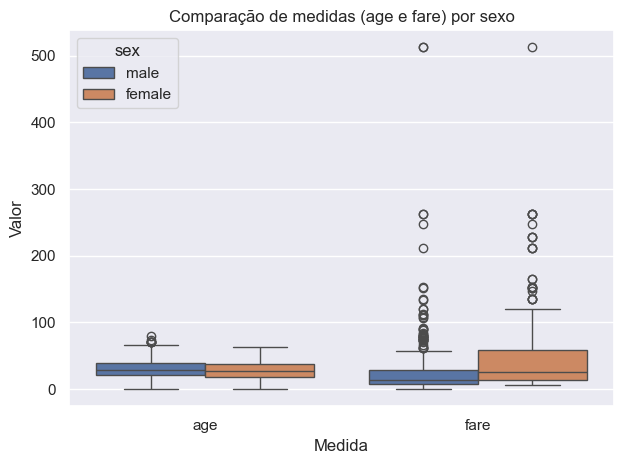

In [13]:
# Boxplot comparando age vs fare por sexo — graças ao formato longo
sns.boxplot(data=long, x='medida', y='valor', hue='sex')
plt.title('Comparação de medidas (age e fare) por sexo')
plt.xlabel('Medida')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# Facetas no seaborn (FacetGrid / catplot)

Facetas são **painéis** (subgráficos) que repetem a mesma visualização para **subconjuntos** dos dados (ex.: um painel para cada sexo).  
A forma mais simples é usar `sns.catplot(..., col='variavel')` (ou `row=`).

Abaixo, mostramos **dois exemplos** usando o Titanic:

1. **Número absoluto**: contagem de passageiros por classe e situação de sobrevivência, *facetado por sexo*.
2. **Percentual**: taxa de sobrevivência (média de `survived`) por classe, *facetado por sexo*.


/var/folders/j_/tz9gc8yj4q353002z3gl5_500000gn/T/ipykernel_90991/25088063.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic3


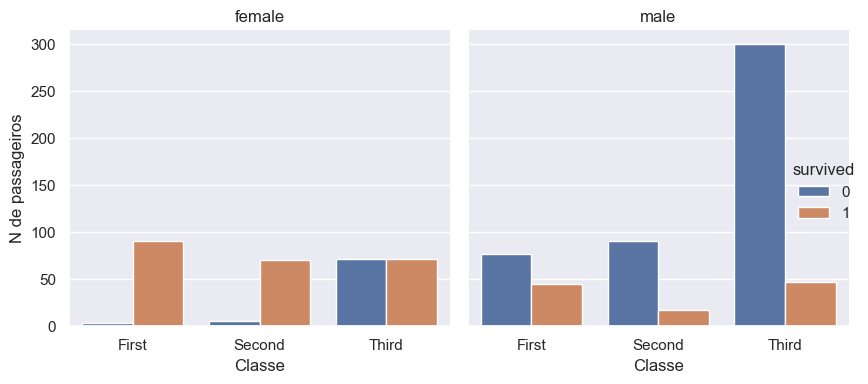

In [14]:
# 1) Exemplo em números absolutos: contagem por classe e survived, facetado por sexo
titanic3 = sns.load_dataset('titanic').dropna(subset=['sex', 'class', 'survived'])

contagem = (
    titanic3
    .groupby(['sex', 'class', 'survived'])
    .size()
    .reset_index(name='n')
)

g = sns.catplot(
    data=contagem,
    x='class', y='n',
    hue='survived',
    col='sex',
    kind='bar',
    height=4, aspect=1
)
g.set_axis_labels("Classe", "N de passageiros")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

In [18]:
# 1) Exemplo percentual: média de sobrevivência por classe, facetado por sexo
titanic2 = sns.load_dataset('titanic').dropna(subset=['sex', 'class', 'survived'])

# Calcula a taxa (%): média de survived por sexo e classe
pct = (
    titanic2
    .groupby(['sex', 'class'])['survived']
    .mean()
    .reset_index(name='taxa_surv')
)

pct

/var/folders/j_/tz9gc8yj4q353002z3gl5_500000gn/T/ipykernel_90991/2099576592.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic2


,sex,class,taxa_surv
0,female,First,0.968085
1,female,Second,0.921053
2,female,Third,0.500000
3,male,First,0.368852
4,male,Second,0.157407
5,male,Third,0.135447


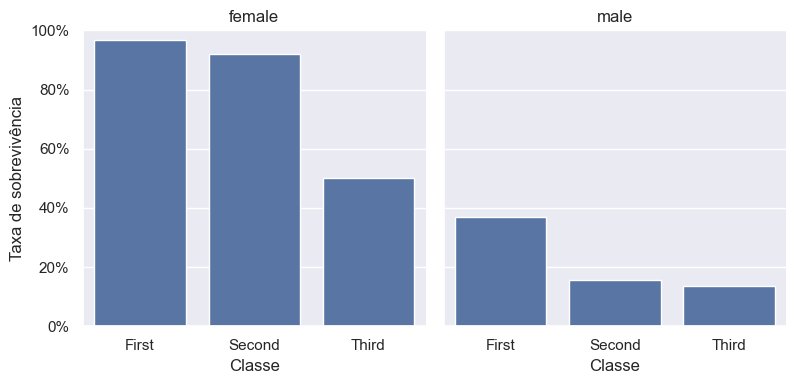

In [19]:
# Gráfico de barras em %, com facetas por sexo
g = sns.catplot(
    data=pct,
    x='class', y='taxa_surv',
    col='sex',
    kind='bar',
    height=4, aspect=1
)
g.set_axis_labels("Classe", "Taxa de sobrevivência")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_ylim(0, 1)  # fixa o eixo em 0–100%
    ax.yaxis.set_major_formatter(lambda x, pos: f"{x*100:.0f}%")
plt.tight_layout()
plt.show()